In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np

# Read the data

First, we need to read the data. To do this, we will use the python package pandas, which allows us to read spreadsheets as 'dataframes' and manipulate them. To learn more about pandas, go here: https://pandas.pydata.org/docs/getting_started/index.html

We will use the pandas function read_csv, which takes as a parameter the name of the file.

**Change**: In the code block below, replace 'your file' with the path to the all.csv file. You can use a relative path (i.e., the path from the current location) or the full path (i.e., the path that would work from any location). The relative path will just be the file name, since the file is in this directory.

Note that to use the function read_csv from the pandas package I use the structure: pandas.functionname(). Also notice, that we use dataframe.head() to view the first few rows of the dataframe.

In [2]:
anolis_data = pandas.read_csv('all.csv')
anolis_data.head()

,Unnamed: 0,Observation.Number,Site,Sex,Hindlimb.Phalanx,Hindlimb.Metatarsal,Tibia,Fibula,Femur,Pelvis.Width,...,Mean.Temp.Warmest.Quarter,Mean.Temp.Coldest.Quarter,Annual.Precip,Precip.Wettest.Month,Precipitation.Driest.Month,Precip.Seasonality,Precip.Wettest.Quarter,Precip.Driest.Quarter,Precip.Warmest.Quarter,Precip.Coldest.Quarter
0,1,A31258,Arlington,M,3.939416,6.025329,10.002438,9.760534,12.321020,6.222543,...,28.5,8.2,877,126,47,31,303,157,191,158
1,2,A31260,Arlington,M,3.336109,6.001124,9.500061,9.408493,12.257699,5.913525,...,28.5,8.2,877,126,47,31,303,157,191,158
2,3,A31262,Arlington,SM,3.078604,5.019630,7.724517,7.548736,9.969174,4.374788,...,28.5,8.2,877,126,47,31,303,157,191,158
3,4,A31263,Arlington,M,3.764948,5.893881,9.929400,9.996210,12.609048,6.111531,...,28.5,8.2,877,126,47,31,303,157,191,158
4,5,A31265,Arlington,M,4.112585,6.322671,10.456931,10.263286,12.960824,6.526829,...,28.5,8.2,877,126,47,31,303,157,191,158


# Plot the data

Now, let's plot some of the data to help decide which variables to use. We'll use the library matplotlib for plotting. Specifically, we imported matplotlib.pyplot as plt. This allows us to refer to functions faster.

**Change**: In the below code replace 'variable1' and 'variable2' with different variables you want to consider for your y and x variables, respectively.

**Add**: Add axis labels using plt.xlabel and plt.ylabel.

**Decide**: Chose an X and Y variable to use moving forward, keeping in mind that we want to be able to predict Y from X. You can choose to try and predict ecological attributes from a morphological trait, or to predict one morphological trait from another.

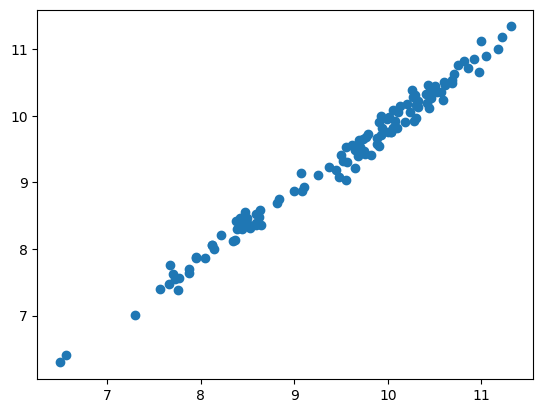

In [3]:
plt.scatter(x=anolis_data['Tibia'],y=anolis_data["Fibula"])

# Functions for making predictions, plotting predictions.

I've included the functions below, please answer the questions about this code for your activity.

**Add**: I didn't comment my code! Add comments to the code.

**Question 1**

**1a.** What parameters does each function take? 

**1b.** Please write out the two equations being used in the function make_predictions. What is the name of the second equation, and how is it used?

In [4]:
def make_predictions (x,y,w,b):
    pred = np.array(x)*np.array(w)+np.array(b)
    mse = sum((np.array(y)-pred)**2) * (1/(2*len(pred)))
    return(pred,mse)

def plot_predictions(x, y, y_hat, xlabel, ylabel):
    plt.scatter(x=x, y=y)
    plt.plot(x, y_hat, color="green")
    [plt.vlines(x=x[i], ymin=y[i], ymax=y_hat[i], color="red", linestyle="--", alpha=0.5) for i in range(len(x))]
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)

# Change the values of w and b

**Add**: Use the functions above to make and plot different predictions for different values of w and b.

**Question 2**: What values of b and w do you think are best? Report the MSE for these values. Discuss regions where the model struggles to make good predictions, if there are any. Ensure these values are used in your notebook when you export it at the end of the activity.

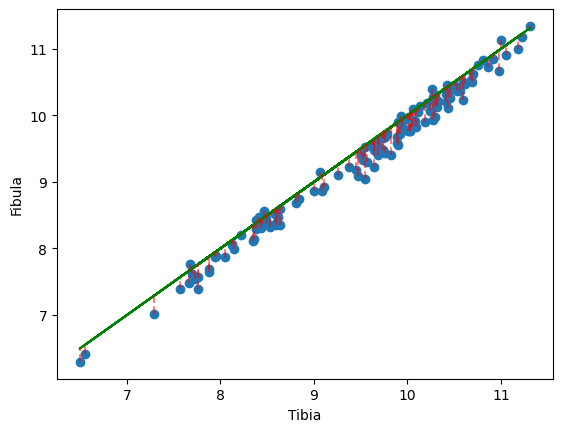

In [5]:
# Add code to use the functions above
x = anolis_data["Tibia"]# specify your x variable
y = anolis_data["Fibula"]# specifiy your w variable
w = 1# specify a value of w to try
b = 0# specify a value of b to try

# use the make_predictions function below to make predictions and calculate the MSE
y_hat, mse = make_predictions(x, y, w, b)

# use the plot_predictions function below to plot the predictions
plot_predictions(x, y, y_hat, 'Tibia', 'Fibula')

# Function for Gradient Descent

Below, I have written a function that will perform gradient descent in python. The function takes several parameters.

* x: the features from your data.
* y: the response/labels from your data.
* iterations: the number of iterations for which to run gradient descent.
* b_init: the value to begin with for b (Default = 0)
* w_init: the value to begin with for w (Default = 0)
* learning rate: the value of alpha to use (Default = 0.005)

**Add**: I didn't comment my code. Add functions to comment my code!

**Question 3**:

**3a**: Please write the equations used to propose new values for w and b, and explain where these equations come from. Note: You do not need to do any derivatives.

**3b**: In linear regression, are we guaranteed to find a global optimum using this approach?

**3c**: Explain all of the objects returned by this function:
* w
* b
* mse
* w_states
* b_states

In [6]:
def fit(x, y, iterations, b_init=0, w_init=0, learning_rate=0.005):
    mse = []
    b_states = []
    w_states = []
    b = b_init
    w = w_init
    n = x.shape[0]
    b_states.append(b)
    w_states.append(w)
    for j in range(iterations):
        pred = np.array(w)*np.array(x) + np.array(b)
        this_mse = sum((np.array(y)-pred)**2) * (1/(2*len(pred)))
        mse.append(this_mse)
        b_gradient = np.sum(pred - y) / n
        w_gradient = np.sum(x*(pred - y)) / n
        b = b - (learning_rate * b_gradient)
        w = w - (learning_rate * w_gradient)
        b_states.append(b)
        w_states.append(w)
    pred = np.array(w)*np.array(x) + np.array(b)
    this_mse = sum((np.array(y)-pred)**2) * (1/(2*len(pred)))
    mse.append(this_mse)
    return(w,b, mse, w_states, b_states)

# Function to plot results

This function will plot the results for gradient descent given the following parameters:
* x: the features from your data.
* y: the response/labels from your data.
* fit_w: the value of w estimated through gradient descent.
* fit_b: the value of b estimated through gradient descent.
* mse: (see above code and question)
* xlabel: label to use for the x-axis.
* ylabel: label to use for the y-axis.

In [7]:
def plot_gradient_descent(x, y, fit_w, fit_b, mse, xlabel, ylabel):
    
    y_hat, mse_final = make_predictions(x, y,fit_w,fit_b)

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))  # Adjust figsize as needed

    axes[0].scatter(x, y)
    axes[0].plot(x, y_hat, color="green")
    [axes[0].vlines(x=x[i], ymin=y[i], ymax=y_hat[i], color="red", linestyle="--", alpha=0.5) for i in range(len(y_hat))]
    axes[0].set_ylabel(ylabel)
    axes[0].set_xlabel(xlabel)
    
    axes[1].plot(range(len(mse)), mse, color="blue")
    axes[1].set_ylabel('MSE')
    axes[1].set_xlabel("Iteration")

# Use gradient descent!

Set the parameters below, and run gradient descent using the function above!

**Add**: Add the settings for all the parameters.

**Question 4:**

**4a**: About how many iterations does it take for gradient descent to converge (Hint: look at the graph and find where MSE stops decreasing).

**4b**: Try different values of the learning rate, alpha. How does changing alpha impact convergence? 

**4c**: Try different starting values for w and b. How does changing these values impact convergence?

**4d**: Choose a learning rate, starting parameters, and number of iterations that you feel are appropriate. Report these values, along with w and b. Discuss how these values compare to those you estimated in Question 2. How does the MSE with these values compare to the MSE with the values you used in Question 2? Is this surprising?

Final w: 0.9744003812052019
Final b: 0.1013348837351549
Final MSE: 0.008109006210411558


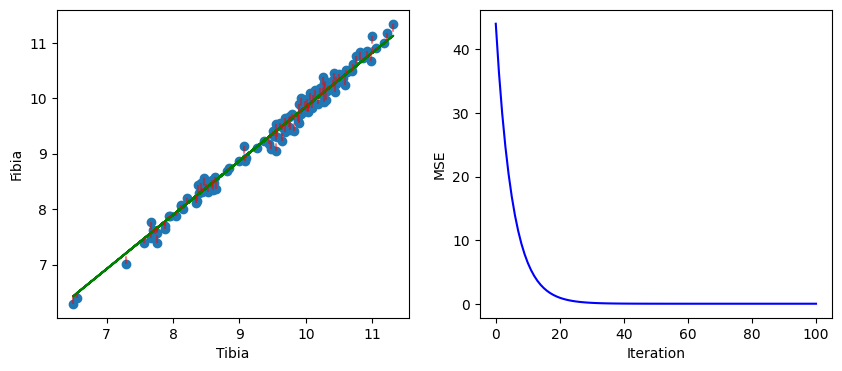

In [8]:
x = anolis_data["Tibia"]
y = anolis_data["Fibula"]
xlabel = "Tibia"
ylabel = "Fibia"
iterations = 100
b_init = 0
w_init = 0
learning_rate = 0.001

fit_w, fit_b, mse, w_states, b_states=fit(x=x, y=y, iterations=iterations, b_init=b_init, w_init=w_init, learning_rate=learning_rate)

plot_gradient_descent(x=x, y=y, fit_w=fit_w, fit_b=fit_b, mse=mse, xlabel=xlabel, ylabel=ylabel)

print("Final w: %s\nFinal b: %s\nFinal MSE: %s" % (fit_w, fit_b, mse[-1]))


# Final Question

**Question 5:**

Save your notebook as a pdf to turn in with your answers to the questions. Do this by clicking File -> Save and Export Notebook As -> pdf.

**Question 6 (6990 Only)**

**6a**: Do you think that the linear model is a good model for this question. Why or why not?

**6b**: Create another function to plot how w and b changed across iterations during gradient descent. 
